# Analysis Subgraph Property


# Connected or Not?

In [24]:
import numpy as np
import networkx as nx

def is_connected_graph(adj_matrix):
    adj_matrix = np.array(adj_matrix)

    G = nx.from_numpy_array(adj_matrix)
    print(f'is_connected = {nx.is_connected(G)}') 
    if not nx.is_connected(G):
        connected_components = nx.connected_components(G)
        largest_cc = max(connected_components, key=len)

        largest_cc_subgraph = G.subgraph(largest_cc).copy()

        largest_cc_size = len(largest_cc)
        print(f'largest_cc_size={largest_cc_size}')

        return largest_cc_subgraph
    else:
        return G


# Degree Distribution

## Attention

non_zero=6308
is_connected = False
largest_cc_size=340
Number of nodes: 340
Number of edges: 3154


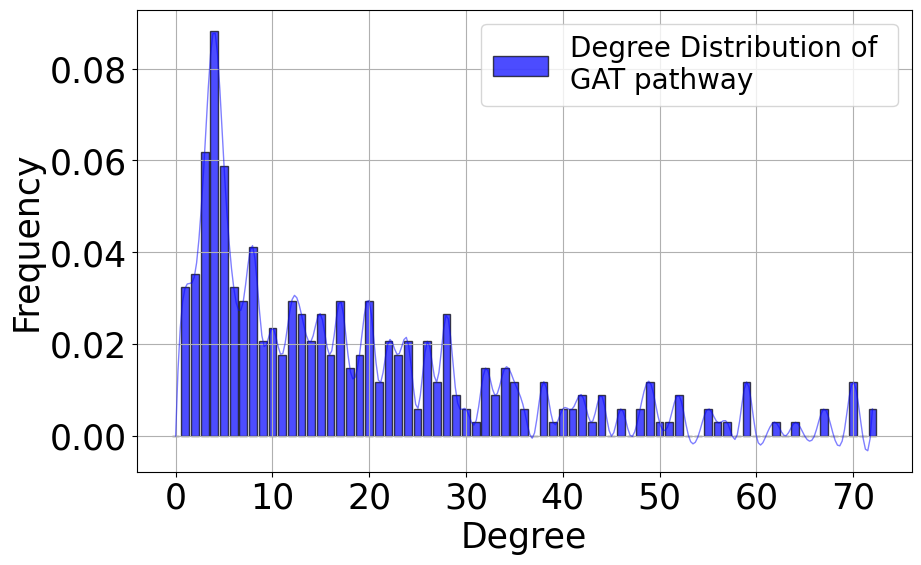

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.interpolate import make_interp_spline


def keep_top_k_percent(matrix, k):
    # Flatten the matrix to 1D array
    flattened = matrix.flatten()
    
    # Calculate the threshold value for top k%
    threshold = np.percentile(flattened, 100 - k)
    
    # Create a boolean mask where elements greater than or equal to threshold are True
    mask = matrix >= threshold
    
    # Apply the mask to keep only the top k% elements and set others to 0
    result = mask * matrix

    result[result!=0] = 1  # binarize
    
    return result


attn = np.load('./avg_GAT_attention.npy')


topk = 5
sparse_attn = keep_top_k_percent(attn, topk)
np.fill_diagonal(sparse_attn, 0)

print(f'non_zero={np.sum(sparse_attn!=0)}')


attn_G = is_connected_graph(sparse_attn)
num_nodes = attn_G.number_of_nodes()
num_edges = attn_G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


fontsize = 25


def plot_degree_distribution(G, file_name):
    # Compute the degree of each node
    degrees = [deg for node, deg in G.degree()]

    # Compute the frequency of each degree
    degree_counts = np.bincount(degrees)
    degrees = np.arange(len(degree_counts))

    # Normalize the degree counts to get a probability distribution
    degree_probs = degree_counts / degree_counts.sum()

    # Plot the degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, degree_probs, width=0.8, color='b', edgecolor='k', alpha=0.7, label='Degree Distribution of \nGAT pathway')

    # Create smooth curve using spline interpolation
    xnew = np.linspace(degrees.min(), degrees.max(), 300)  # 300 represents number of points to make the curve smooth
    spl = make_interp_spline(degrees, degree_probs, k=3)  # BSpline object
    degree_probs_smooth = spl(xnew)

    # Plot the connecting curve
    plt.plot(xnew, degree_probs_smooth, color='b', linestyle='-', linewidth=1, alpha=0.5)

    plt.xlabel('Degree', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    # plt.title('Degree Distribution of Attention-based Subgraph')
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')

    plt.show()


if __name__ == "__main__":

    file_name = './degree_dist_attention.pdf'
    plot_degree_distribution(attn_G, file_name)




## FC Weights

non_zero=6480
is_connected = True
Number of nodes: 360
Number of edges: 3240


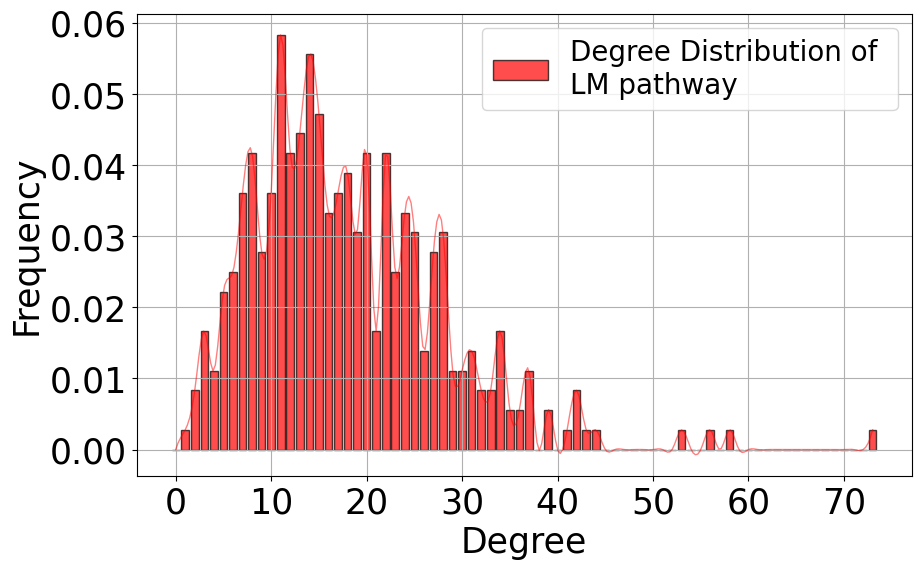

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.interpolate import make_interp_spline


def abs_keep_top_k_percent(matrix, k):
    # Flatten the matrix to 1D array
    flattened = np.abs(matrix.flatten())
    
    # Calculate the threshold value for top k%
    threshold = np.percentile(flattened, 100 - k)
    
    # Create a boolean mask where elements greater than or equal to threshold are True
    mask = np.abs(matrix) >= threshold
    
    # Apply the mask to keep only the top k% elements and set others to 0
    result = mask * matrix

    result[result!=0] = 1  # binarize
    
    return result


fc_weight = np.load('./avg_LM_weight.npy')

topk = 5
sparse_fc = abs_keep_top_k_percent(fc_weight, topk)
np.fill_diagonal(sparse_fc, 0)


print(f'non_zero={np.sum(sparse_fc!=0)}')


fc_G = is_connected_graph(sparse_fc)
num_nodes = fc_G.number_of_nodes()
num_edges = fc_G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")




fontsize = 25

def plot_degree_distribution(G, file_name):
    # Compute the degree of each node
    degrees = [deg for node, deg in G.degree()]

    # Compute the frequency of each degree
    degree_counts = np.bincount(degrees)
    degrees = np.arange(len(degree_counts))

    # Normalize the degree counts to get a probability distribution
    degree_probs = degree_counts / degree_counts.sum()

    # Plot the degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, degree_probs, width=0.8, color='r', edgecolor='k', alpha=0.7, label='Degree Distribution of \nLM pathway')

    # Create smooth curve using spline interpolation
    xnew = np.linspace(degrees.min(), degrees.max(), 300)  # 300 represents number of points to make the curve smooth
    spl = make_interp_spline(degrees, degree_probs, k=3)  # BSpline object
    degree_probs_smooth = spl(xnew)

    # Plot the connecting curve
    plt.plot(xnew, degree_probs_smooth, color='r', linestyle='-', linewidth=1, alpha=0.5)

    plt.xlabel('Degree', fontsize=fontsize)
    plt.ylabel('Frequency', fontsize=fontsize)
    # plt.title('Degree Distribution of LM Subgraph')
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.savefig(file_name, format='pdf', bbox_inches='tight')

    plt.show()


if __name__ == "__main__":

    file_name = './degree_dist_weights.pdf'
    plot_degree_distribution(fc_G, file_name)



# Draw on one figure

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def double_plot_degree_distribution(adj_matrix1, adj_matrix2):
    # Ensure the adjacency matrices are numpy arrays
    adj_matrix1 = np.array(adj_matrix1)
    adj_matrix2 = np.array(adj_matrix2)

    # Create graphs from the adjacency matrices
    G1 = nx.from_numpy_array(adj_matrix1)
    G2 = nx.from_numpy_array(adj_matrix2)

    # Compute the degree of each node in both graphs
    degrees1 = [deg for node, deg in G1.degree()]
    degrees2 = [deg for node, deg in G2.degree()]

    # Plot the degree distribution for both graphs
    plt.figure(figsize=(10, 6))
    
    
    # Degree distribution for the second graph
    plt.hist(degrees2, bins=range(min(degrees2), max(degrees2) + 2), density=True, alpha=0.75, color='r', edgecolor='k', label='sparse_attn')
    
    # Degree distribution for the first graph
    plt.hist(degrees1, bins=range(min(degrees1), max(degrees1) + 2), density=True, alpha=0.75, color='b', edgecolor='k', label='sparse_fc')


    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution of Two Graphs')
    plt.legend()
    plt.grid(True)
    plt.show()



double_plot_degree_distribution(sparse_fc, sparse_attn)


# Connected or not?

In [ ]:
import numpy as np
import networkx as nx

def is_connected_graph(adj_matrix):
    # Ensure the adjacency matrix is numpy array
    adj_matrix = np.array(adj_matrix)

    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    print(f'is_connected = {nx.is_connected(G)}') 
    if not nx.is_connected(G):
        connected_components = nx.connected_components(G)
        largest_cc = max(connected_components, key=len)

        # Create a subgraph from the largest connected component
        largest_cc_subgraph = G.subgraph(largest_cc).copy()

        # Get the size of the largest connected component
        largest_cc_size = len(largest_cc)
        print(f'largest_cc_size={largest_cc_size}')

        return largest_cc_subgraph
    else:
        return G



attn_G = is_connected_graph(sparse_attn)
num_nodes = attn_G.number_of_nodes()
num_edges = attn_G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


fc_G = is_connected_graph(sparse_fc)
num_nodes = fc_G.number_of_nodes()
num_edges = fc_G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")






# Clustering Coefficient

In [ ]:
import numpy as np
import networkx as nx

def calculate_clustering_coefficient(G):

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    
    # Compute the clustering coefficient for each node
    clustering_coefficients = nx.clustering(G)
    
    # Calculate the average clustering coefficient
    avg_clustering_coefficient = np.mean(list(clustering_coefficients.values()))
    
    return avg_clustering_coefficient

if __name__ == "__main__":
    
    attn_avg_clustering_coefficient = calculate_clustering_coefficient(attn_G)

    print(f"Average Clustering Coefficient: {attn_avg_clustering_coefficient}")


    fc_avg_clustering_coefficient = calculate_clustering_coefficient(fc_G)

    print(f"FC Average Clustering Coefficient: {fc_avg_clustering_coefficient}")



# Modularity


In [ ]:
import numpy as np
import networkx as nx
import community as community_louvain

def calculate_modularity(G):

    # Detect communities using the Louvain algorithm
    partition = community_louvain.best_partition(G)

    # Compute the modularity of the partition
    modularity_value = community_louvain.modularity(partition, G)
    
    return modularity_value

    
modularity_value = calculate_modularity(attn_G)
print(f"Modularity: {modularity_value}")

fc_modularity_value = calculate_modularity(fc_G)
print(f"FC Modularity: {fc_modularity_value}")



# Shortest path length

In [ ]:
import numpy as np
import networkx as nx

def calculate_average_shortest_path_length(G):
    # Check if the graph is connected
    assert nx.is_connected(G), 'graph is not connected'
    
    # Compute the average shortest path length
    avg_shortest_path_length = nx.average_shortest_path_length(G)
        
    return avg_shortest_path_length

    
avg_shortest_path_length = calculate_average_shortest_path_length(attn_G)
print(f"Average Shortest Path Length: {avg_shortest_path_length}")


fc_avg_shortest_path_length = calculate_average_shortest_path_length(fc_G)
print(f"FC Average Shortest Path Length: {fc_avg_shortest_path_length}")



# Global Efficiency

In [ ]:
import numpy as np
import networkx as nx

def calculate_global_efficiency(G):
    
    # Compute the global efficiency
    global_efficiency = nx.global_efficiency(G)
    
    return global_efficiency


global_efficiency = calculate_global_efficiency(attn_G)
print(f"Global Efficiency: {global_efficiency}")


fc_global_efficiency = calculate_global_efficiency(fc_G)
print(f"FC Global Efficiency: {fc_global_efficiency}")


# small-worldness

In [ ]:
import numpy as np
import networkx as nx

def calculate_small_worldness(G):

    # Compute the average clustering coefficient
    C = nx.average_clustering(G)

    # Compute the average shortest path length
    assert nx.is_connected(G), 'not connected'
    L = nx.average_shortest_path_length(G)
    
    print(f'C={C}, L={L}')
    # Generate a random graph with the same number of nodes and edges
    n = len(G.nodes())
    m = len(G.edges())

    L_avg, C_avg = 0, 0
    random_cnt = 0
    
    while random_cnt < 100:
        random_graph = nx.gnm_random_graph(n, m)

        if nx.is_connected(random_graph):
            L_rand = nx.average_shortest_path_length(random_graph)
            C_rand = nx.average_clustering(random_graph)
            L_avg += L_rand
            C_avg += C_rand
            random_cnt+=1

    L_avg/=100
    C_avg/=100
    print(f'C_avg={C_avg}, L_avg={L_avg}')

    # Calculate small-worldness
    small_worldness = (C / C_avg) / (L / L_avg)

    if C > C_avg and ((L > L_avg and abs(L - L_avg) / L_avg < 0.1) or L < L_avg):
        print(f'is small world network')
    else:
        print(f'not a small world network')
    
    return small_worldness


small_worldness = calculate_small_worldness(attn_G)
print(f"Small-Worldness: {small_worldness}")

print('\n')

fc_small_worldness = calculate_small_worldness(fc_G)
print(f"FC Small-Worldness: {fc_small_worldness}")





# Assortativity coefficient

In [ ]:
import numpy as np
import networkx as nx

def calculate_assortativity_coefficient(G):
    # Compute the assortativity coefficient
    assortativity_coefficient = nx.degree_assortativity_coefficient(G)
    
    return assortativity_coefficient

    
assortativity_coefficient = calculate_assortativity_coefficient(attn_G)
print(f"Assortativity Coefficient: {assortativity_coefficient}")


fc_assortativity_coefficient = calculate_assortativity_coefficient(fc_G)
print(f"FC Assortativity Coefficient: {fc_assortativity_coefficient}")


# Combine the above metrics to generate a Radar figure

/tmp/ipykernel_3209313/271280444.py:98: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


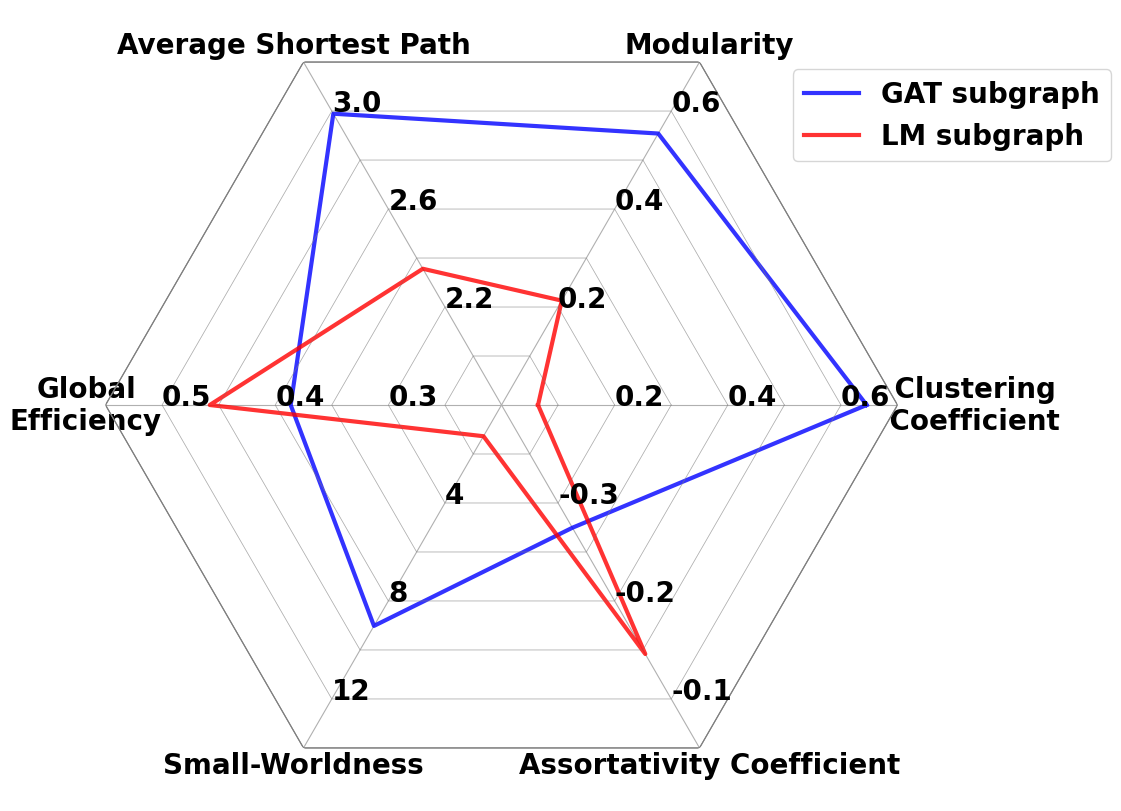

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class Radar(object):
    
    def __init__(self, figure, title, labels, epoch, rect=None):
        if rect is None:
            rect = [0.01, 0.01, 0.99, 0.99]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0 / self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=20, weight='semibold')

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label, i in zip(self.axes, self.angles, labels, epoch):
            ax.set_rgrids([])  # Remove the circular grid lines
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(i[0], i[-1])
            for label_i, value in zip(label, i[1:]):
                ax.text(np.deg2rad(angle), value, label_i, horizontalalignment='left', size=20, color='black',weight='semibold')

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        limits = []

        limits.append((values[1]-0.1)/0.1)
        limits.append((values[2]-2)/0.2)
        limits.append((values[3]-0.25)/0.05)
        limits.append((values[4]-2)/2)
        limits.append((values[5]+0.35)/0.05)

        for i in range(1, len(values)):
            values[i] = (limits[i-1])*0.1 + 0.1

        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        
        # Draw polygon instead of circle
        self._draw_polygon()

    def _draw_polygon(self):
        angles = np.deg2rad(self.angles)
        angles = np.append(angles, angles[0])
        
        for i in range(1, 8):
            if i<7:
                self.ax.plot(angles, [i/10] * len(angles), 'grey', lw=0.5, alpha=0.4)
            else:
                self.ax.plot(angles, [i/10] * len(angles), 'grey', lw=0.8, alpha=1)

if __name__ == '__main__':
    fig = plt.figure(figsize=(8, 8))
    
    # Metric titles
    tit = ['            Clustering\n            Coefficient', 'Modularity', 'Average Shortest Path', 'Global\nEfficiency', 'Small-Worldness', 'Assortativity Coefficient']
    
    # Labels for each metric axis
    lab = [
        ['', '0.2', '', '0.4', '', '0.6', ''],
        ['', '0.2', '', '0.4', '', '0.6', ''],
        ['', '2.2', '', '2.6', '', '3.0', ''],
        ['', '0.3', '', '0.4', '', '0.5', ''],
        ['', '4', '', '8', '', '12', ''],
        ['','-0.3', '', '-0.2', '', '-0.1', '']
    ]
    
    # Range for each metric axis
    epo = [
        [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
        [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
        [1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2],
        [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55],
        [0, 2, 4, 6, 8, 10, 12, 14],
        [-0.4, -0.35, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05]
    ]
    
    radar = Radar(fig, tit, lab, epo)
    
    # Data values
    upper_values = [0.06458366, 0.21303197, 2.35614360, 0.45786779, 1.27486476, -0.14586043]
    lower_values = [0.64537359, 0.55410684, 2.98910289, 0.38632193, 9.01772090, -0.27472224]
    
    # Plot data
    radar.plot(lower_values, '-', lw=3, color='b', alpha=0.8, label='GAT subgraph')
    radar.plot(upper_values, '-', lw=3, color='r', alpha=0.8, label='LM subgraph')

    radar.ax.legend(bbox_to_anchor=(0.85, 0.79), prop={'weight': 'semibold', 'size':20})
    

    plt.tight_layout(pad=2.0)
    plt.savefig('./radar.pdf', format='pdf', bbox_inches='tight')

    plt.show()


    
